## Introduction

Ce notebook vise à introduire les méthodes utiliser pour charger les données et optimiser un modèle sur une fonction objectif donnée, avec visualisation des plannings obtenus.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from rich.pretty import pprint

from projet_sdp.model import Model
from projet_sdp.loader import Data, load_data_from_json
from projet_sdp.generator import generate_random
from projet_sdp.ploter import Ploter

## Chargement des données

In [6]:
data: Data = load_data_from_json("../data/toy_instance.json")
# data: Data = generate_random(N=5, E=3, P=3, Q=3)

In [7]:
pprint(data)

Data(
│   N=5,
│   E=3,
│   Q=3,
│   P=5,
│   _qualifications=[[0, 1, 2], [0, 1], [2]],
│   _conges=[[], [0], [1]],
│   _duree=[[1, 1, 1], [1, 2, 0], [1, 0, 2], [0, 2, 1], [0, 0, 2]],
│   _gain=[20, 15, 15, 20, 10],
│   _due_date=[2, 2, 3, 2, 4],
│   _penalty=[3, 3, 3, 3, 3],
│   _employees_names=['Olivia', 'Liam', 'Emma'],
│   _qualifications_names=['A', 'B', 'C'],
│   _projects_names=['Job1', 'Job2', 'Job3', 'Job4', 'Job5'],
│   M=10000000.0
)

## Génération du modèle Gurobi

In [8]:
m = Model(data)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-05


In [12]:
# Ajouter les contraintes par défaut
m.constraint_cant_work_more_than_needed()
m.constraint_cant_work_on_days_off()
m.constraint_no_qual_work()
m.constraint_one_project_per_day()

# Ajouter les contraintes liées aux variables de décision introduites
m.determine_affecte()
m.determine_debute()
m.determine_realise()

# Fixer la fonction objectif
m.objective_max_gain()
# m.objective_min_affecte()
# m.objective_min_length()
m.update()

## Résolution

In [16]:
#m.model.setParam("OutputFlag", 0)
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 410 rows, 295 columns and 4400 nonzeros
Model fingerprint: 0xfd888bee
Variable types: 0 continuous, 295 integer (295 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+07]
  Objective range  [1e-05, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+07]
Presolved: 44 rows, 111 columns, 443 nonzeros

Continuing optimization...


Cutting planes:
  Gomory: 5
  Cover: 3
  GUB cover: 7
  RLT: 1

Explored 1 nodes (175 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 5: 63.9998 63.9998 60.9998 ... -21.0002

Optimal solution found (tolerance 1.00e-04)
Best objective 6.399983000000e+01, best bound 6.399984500000e+01, gap 0.0000%


## Affichage des solutions

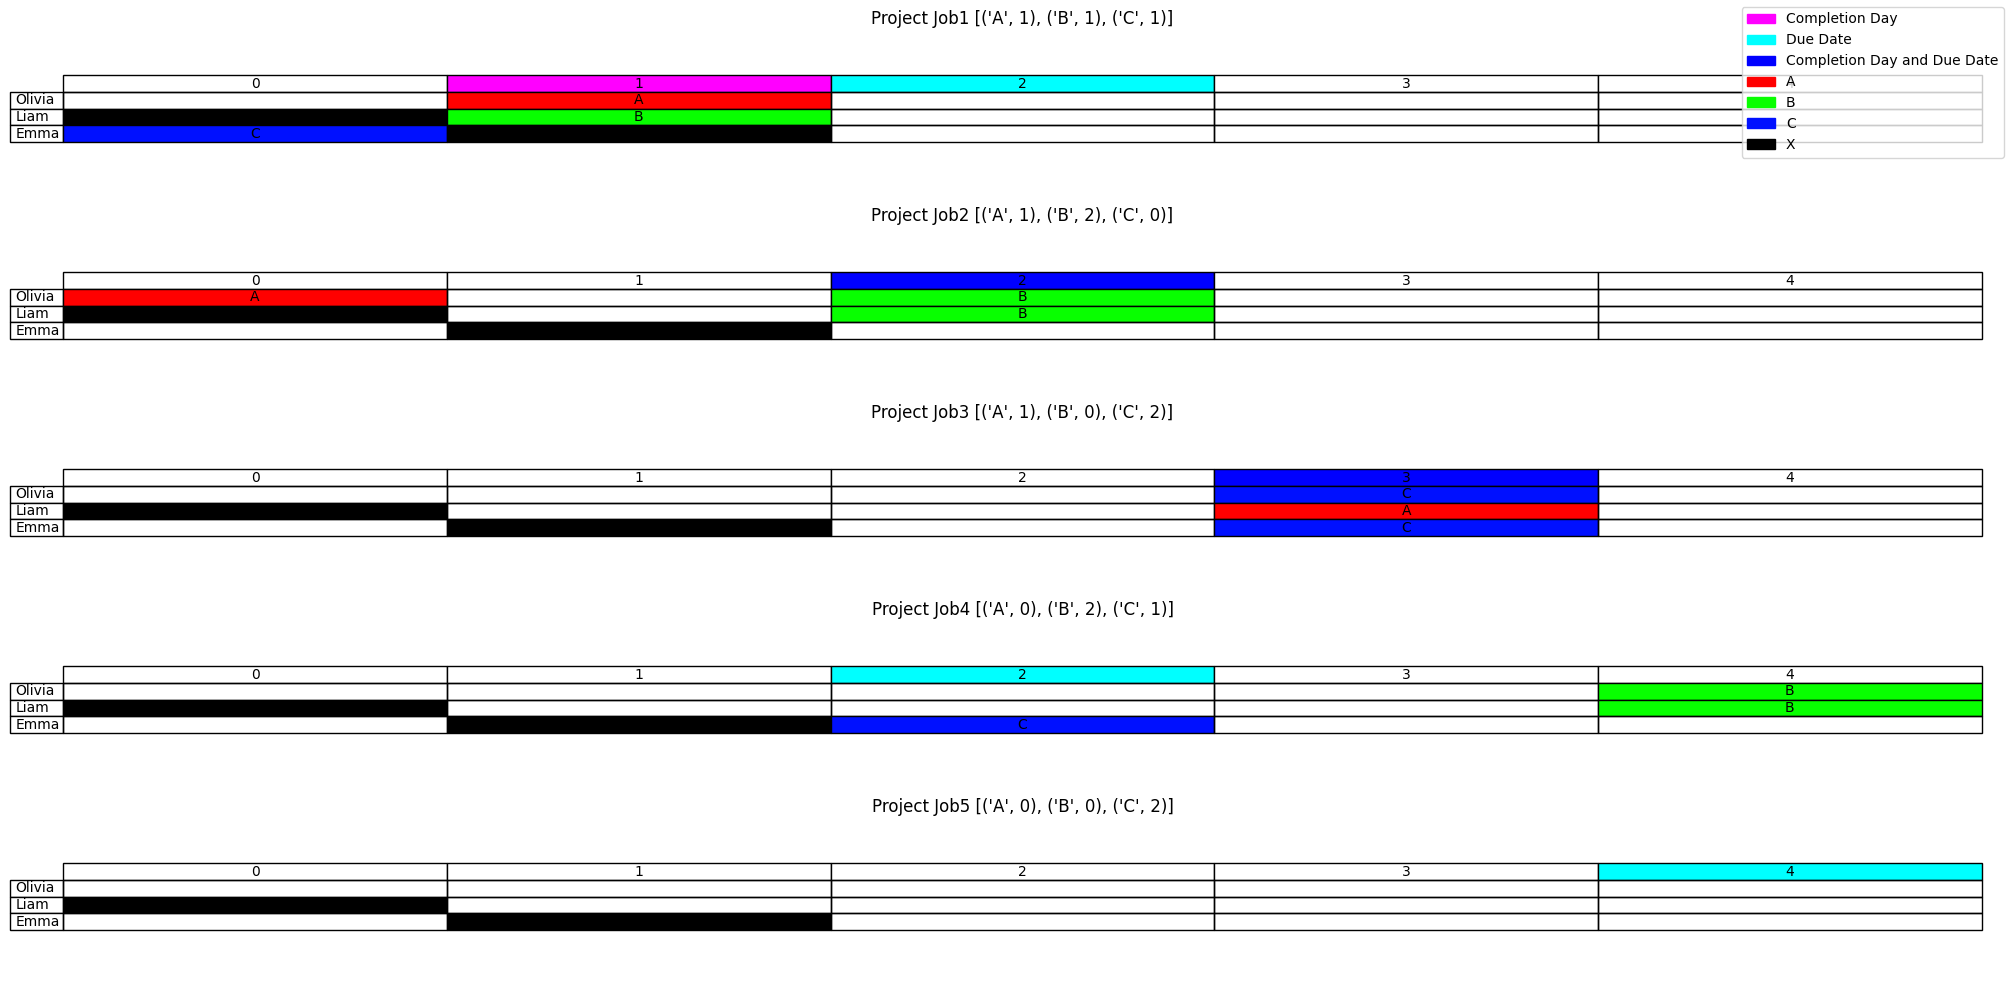

In [20]:
plot: Ploter = Ploter(m)

plot.gantt_projects()

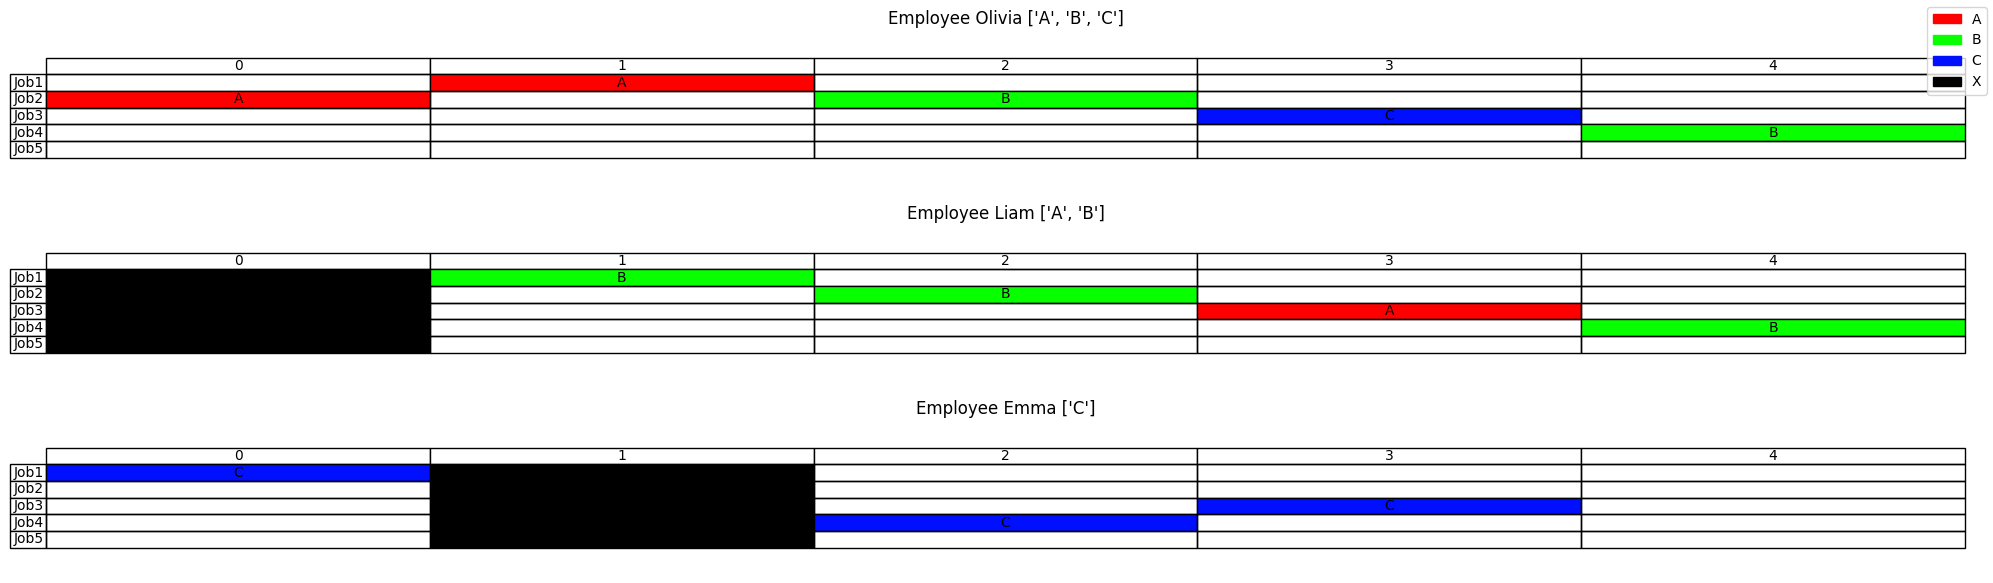

In [21]:
plot.gantt_employees()